<br>

## Week 2 - Lab Session: Linear Regression with California Housing Data

Welcome to the Week 2 Lab Session on Linear Regression. This week, we will delve into the fundamentals of linear regression, a crucial technique in predictive modeling. Our primary focus will be on applying linear regression models using the `statsmodels` and `scikit-learn` packages in Python.

### Dataset: California Housing

For this lab session, we will be using the California Housing dataset, a comprehensive dataset that includes various features of residential homes in California. This dataset is widely used for practicing and understanding regression models due to its rich and detailed attributes.

#### Description of the California Housing Dataset

The California Housing dataset contains detailed information on individual residential properties in California. It includes a variety of features such as the median house value, median income, housing median age, total rooms, total bedrooms, population, households, latitude, and longitude.

#### Where to Find the Dataset

You can find the California Housing dataset within the course materials provided or on various online repositories. Ensure that you have downloaded and unzipped the dataset before the lab session.

### Objectives of the Lab

In this lab session, we will:

1. **Explore the Dataset**: Understand the structure and key variables of the California Housing dataset.
2. **Data Wrangling**: Use `panda` functions to clean and prepare the data for modeling.
3. **Model Building**: Apply linear regression models using the `scikit-learn` framework.
4. **Model Evaluation**: Evaluate the performance of our models and interpret the results.

#### Tools and Packages

We will primarily use the following Python packages:
- **panda**: Used for data manipulation and analysis, particularly for handling structured data in DataFrame objects.
- **seaborn**: A Python visualization library built on top of Matplotlib, used for making statistical graphics.
- **matplotlib**: A plotting library used for creating static, interactive, and animated visualizations in Python.
- **scikit-learn**: A machine learning library used for building models, including linear regression, and other machine learning algorithms.
- **statsmodels**: Used for statistical modeling, including linear regression, and for obtaining more detailed statistical properties of models.
Make sure to have these packages installed and loaded before the lab session.
- **Numpy**: A fundamental package for scientific computing with Python, used for handling arrays and matrices of data.
- **gridExtra**: A utility for arranging multiple plots in a grid.

Let's get started with linear regression and discover how we can use the California Housing dataset to build and evaluate predictive models!

<br>

### 1. Loading Libraries and the Housing Dataset 

To begin, we load the necessary packages for this tutorial which include: Pandas, Seaborn, Matplotlib, Scikit-learn, Statsmodels, Numpy, GridExtra, and Patchwork.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import scipy.stats as stats

In [5]:
# Load and explore the dataset
housing=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\housing.csv")
print(housing.head(10))  # Equivalent to slice_head
print(housing.info())  # Equivalent to glimpse
print(housing.shape)  # Equivalent to dim
print(housing.columns)  # Equivalent to names

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0   


<div class="alert alert-block alert-info" style="background-color:white">

#### Objective: Predict the Sales 

Our objective is to predict the $median \ house |value$ of the House based on a set of features provided. 

</div>

<br>


In [6]:
# Set plot theme
sns.set_theme(style="whitegrid")

### Exploring the California Housing Dataset

Our first step in exploring the dataset is to look at the dependent variable `median_house_value`. The goal is to understand its structure and use that information to inform the modeling process.

#### 1. Distribution of the Median House Value

To begin, we will visualize the distribution of the `median_house_value`. This will help us understand the range, central tendency, and spread of the house values in the dataset. Visualizing the distribution can also reveal any potential skewness or outliers that might affect our regression model. We can use histograms or density plots to achieve this.


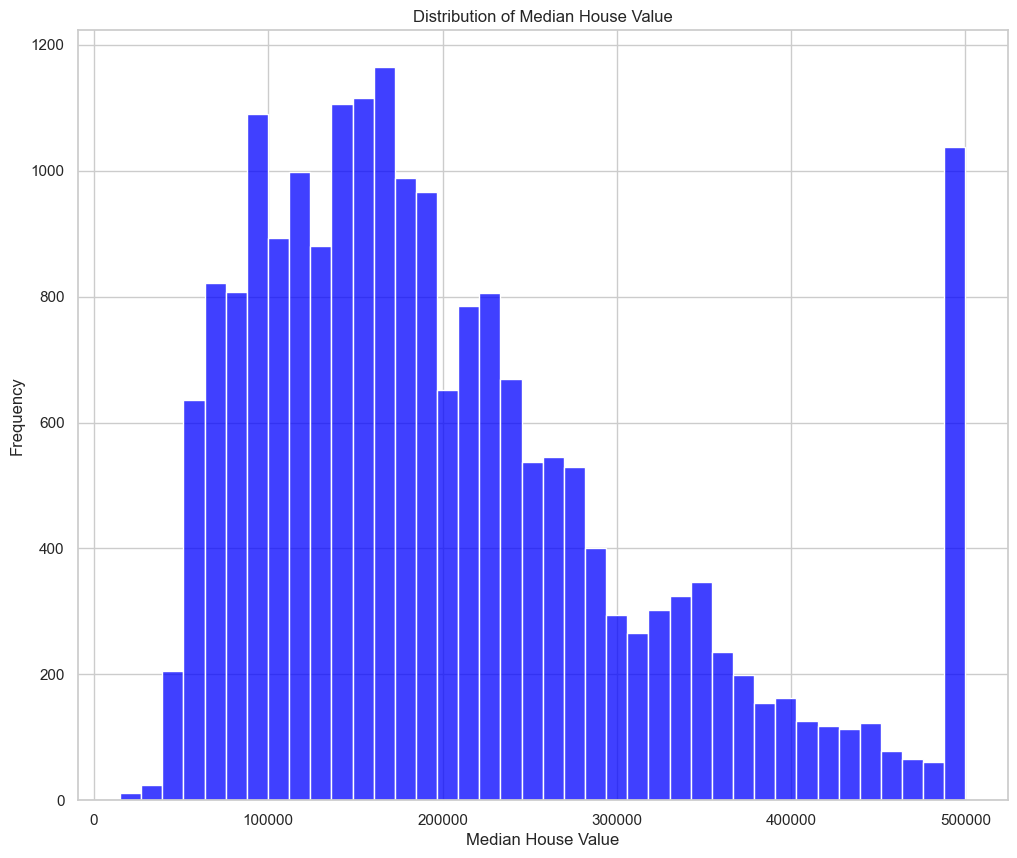

In [7]:
# Visualize the distribution of the median house value
plt.figure(figsize=(12, 10))
sns.histplot(housing['median_house_value'], bins=40, color='blue', kde=False)
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()


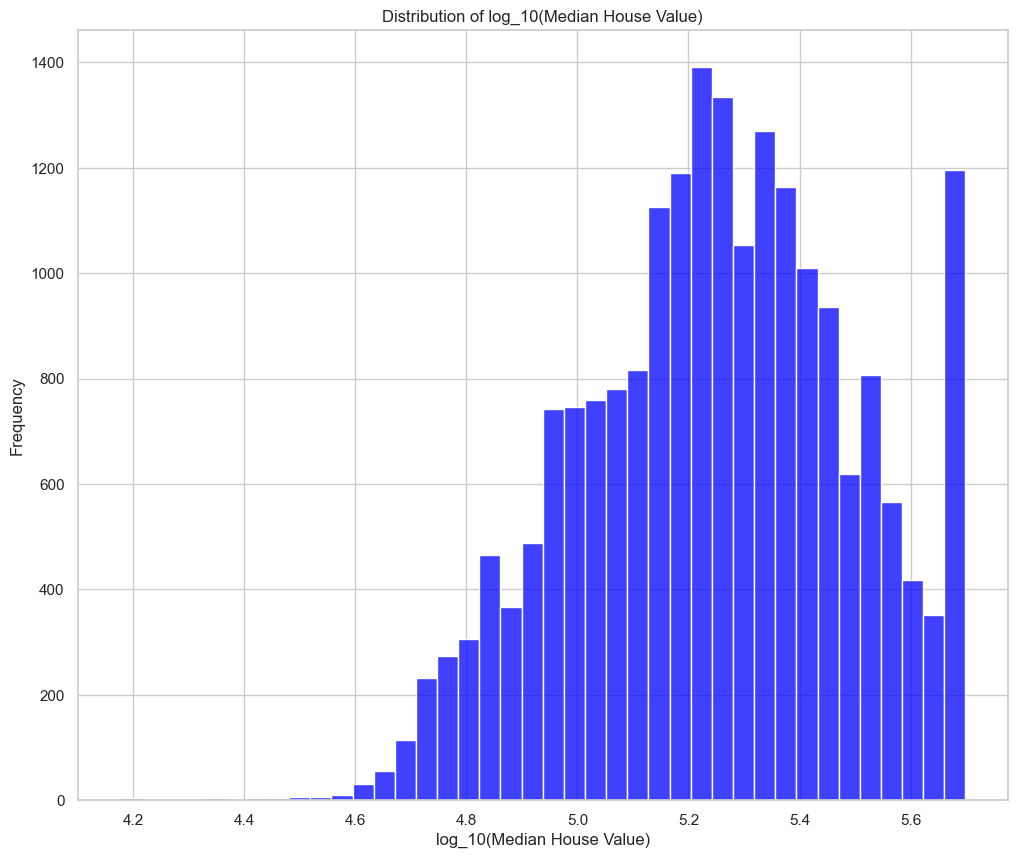

In [8]:
# Visualize the distribution of log-transformed median house value
plt.figure(figsize=(12, 10))
sns.histplot(np.log10(housing['median_house_value']), bins=40, color='blue', kde=False)
plt.title("Distribution of log_10(Median House Value)")
plt.xlabel("log_10(Median House Value)")
plt.ylabel("Frequency")
plt.show()


<br>


<div class="alert alert-block alert-info" style="background-color:white">

#### General Observations

1. The distribution of the `median_house_value` slightly right skewed, with outliers at the highest priced houses. Broadly, a right skewed distribution can be interpreted as there are more inexpensive houses than there are expensive house.

2. Similarly, the housing prices are denominated in large values (in Hundreds of thousands). A tranformation of the values using log transforms could improve modeling results.
  
Note that while tranformation will improve modeling results, there are cost associated with interpretability of both the coefficients and the model fit units such as RMSE or MSE. Since these are based on the difference of $predicted$ vs $actual$ values, the metrics will also be implicitly $log_{10}$.

</div>

<br>


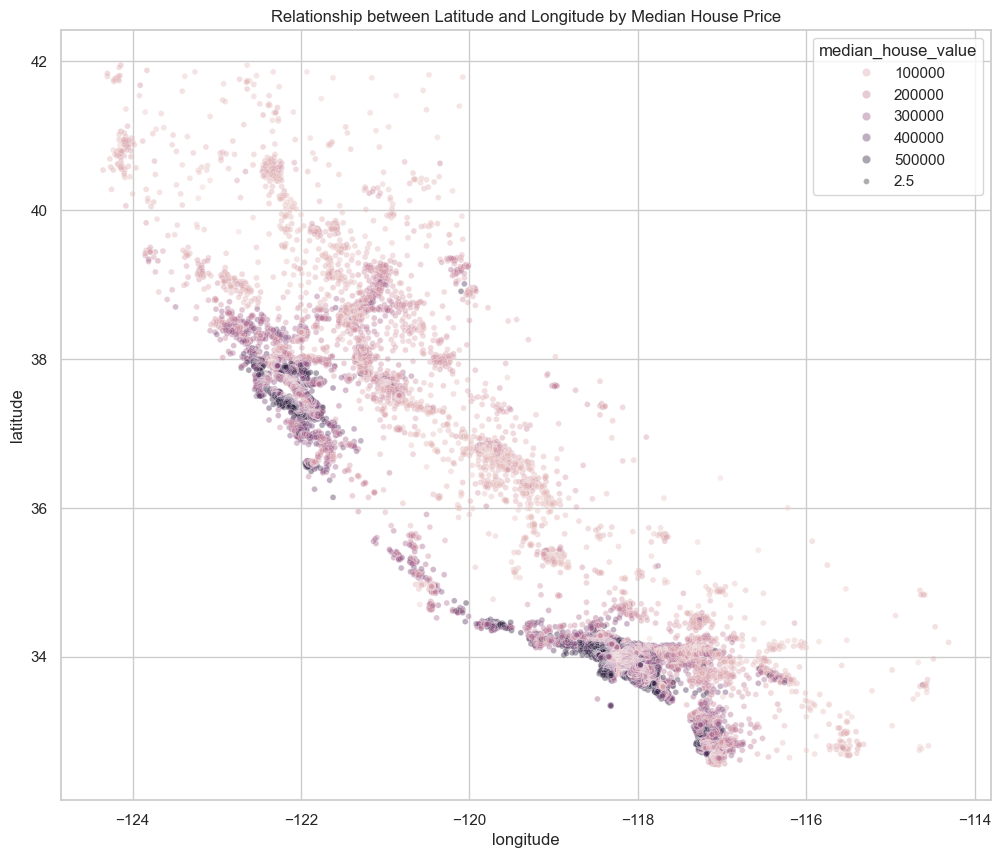

In [9]:
# Scatter plot: Relationship between Latitude and Longitude by Median House Price
plt.figure(figsize=(12, 10))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', size=2.5, alpha=0.4, data=housing)
plt.title('Relationship between Latitude and Longitude by Median House Price')
plt.show()

<div class="alert alert-block alert-info" style="background-color:white">

#### General Observations

1. One useful observation is that the `median_house_value` tends to be higher for homes located on the left side of the `latitude` and `longitude` coordinates, which correspond to the coastal area. This suggests that `ocean_proximity` is an important factor in determining house values.

2. However, it is important to note that not all houses near the coast are more expensive than those further inland. Therefore, we should consider additional factors in our analysis to gain a more comprehensive understanding of house prices.

</div>

<br>


### Relationship Between Population and Median House Value

Now we look at the relationship between Population and Median House Value to determine whether high or low density population determine the value of a home.

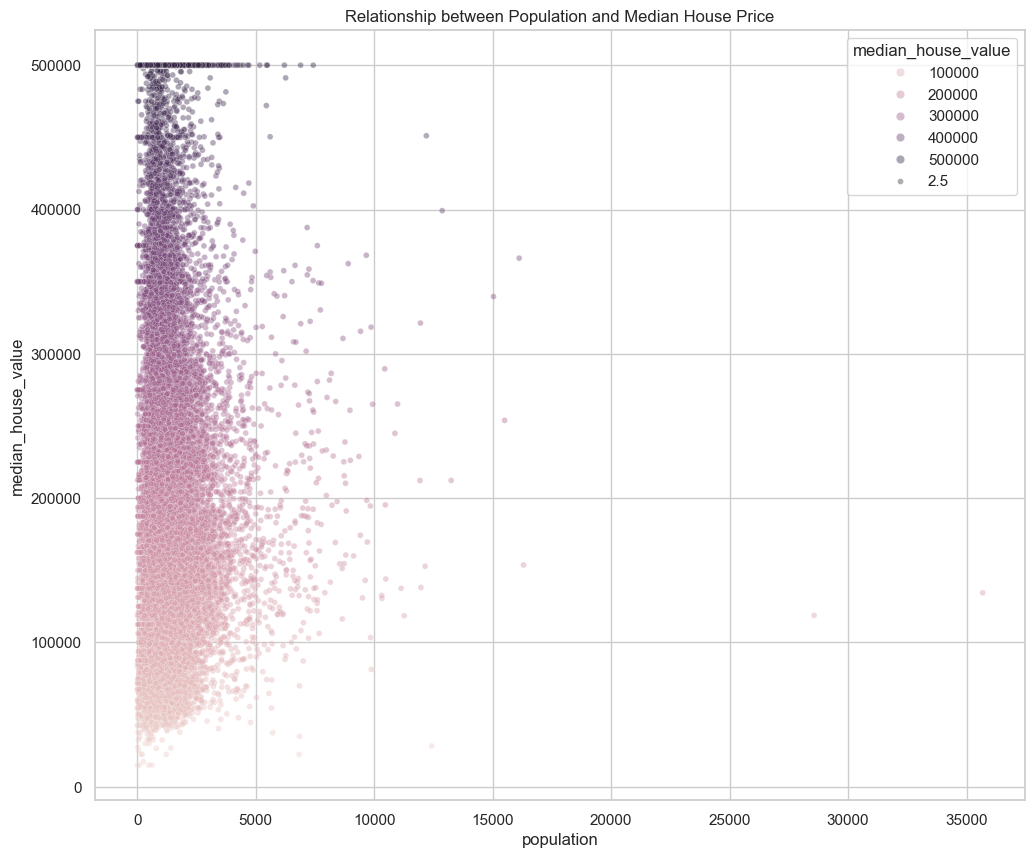

In [10]:
# Scatter plot: Relationship between Population and Median House Price
plt.figure(figsize=(12, 10))
sns.scatterplot(x='population', y='median_house_value', hue='median_house_value', size=2.5, alpha=0.4, data=housing)
plt.title('Relationship between Population and Median House Price')
plt.show()


<br>

<div class="alert alert-block alert-info" style="background-color:white">

#### General Observations

1. There is no obvious relationship between the population of an area with the median_house_value variable.

2. We also observe a few outlier points with significant high population numbers. 
</div>

<br>



### Relationship Between Median Income and Median House Value

Now we look at the relationship between Median Income and Median House Value to determine whether the value of a home increases with a rise in median income.

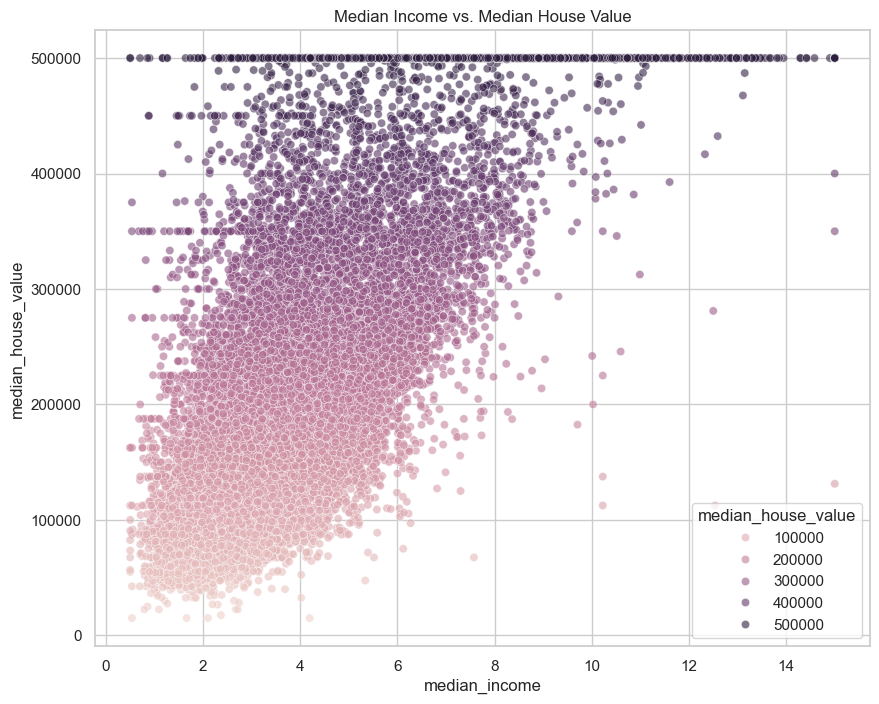

In [12]:

# Scatter plot: Median Income vs. Median House Value
plt.figure(figsize=(10, 8))
sns.scatterplot(x='median_income', y='median_house_value', hue='median_house_value', alpha=0.6, data=housing)
plt.title('Median Income vs. Median House Value')
plt.show()

<br>

<div class="alert alert-block alert-info" style="background-color:white">

#### General Observations

1. We observe a positive linear relationship between median_income and median_house_value such that neighborhoods with higher median income tend to have higher median_house_value.

</div>

<br>




### Lab Exercise: How would you implement a view of the distribution of House Price by Ocean Proximity and Population

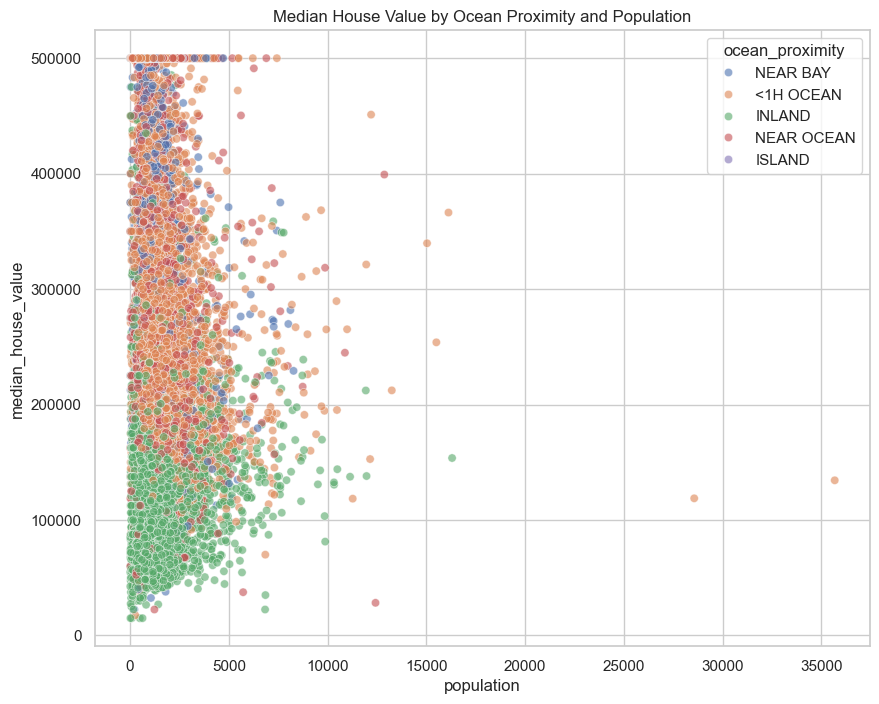

In [13]:
# Scatter plot: Median House Value by Ocean Proximity and Population
plt.figure(figsize=(10, 8))
sns.scatterplot(x='population', y='median_house_value', hue='ocean_proximity', alpha=.6, data=housing)
plt.title('Median House Value by Ocean Proximity and Population')
plt.show()

### Implementing Simple Linear Regression

As discussed in the lecture, Simple linear regression is a fundamental technique in predictive modeling that examines the linear relationship between two variables: one independent variable (predictor) and one dependent variable (response). The goal is to model the relationship between these variables by fitting a linear equation to the observed data.

The mathematical formula for simple linear regression is:

$$ y = \beta_0 + \beta_1 x + \epsilon $$

Where:
- $y$ is the dependent variable (response),
- $x$ is the independent variable (predictor),
- $\beta_0$ is the y-intercept of the regression line,
- $\beta_1$ is the slope of the regression line, representing the change in $y$ for a one-unit change in $x$,
- $\epsilon$ is the error term, accounting for the variation in $y$ that cannot be explained by the linear relationship with $x$.

In this section, we will build a simple linear regression model using the California Housing dataset. We will explore how the `tidymodels` and `tidyverse` packages in R can be used to fit the model, evaluate its performance, and interpret the results. Our primary focus will be on predicting the `median_house_value` using relevant predictor variables from the dataset.



<br>

### Splitting the Data into Train and Test

A fundamental aspect of statistical modeling is the process of splitting your data into training and testing sets. This allows you to build and validate your model effectively. The training set is used to fit the model, while the testing set is used to evaluate its performance on unseen data. This helps in assessing the model’s generalizability and ensures that it performs well on new data.

Splitting the data into train and test sets involves the following steps:

__Set a Seed for Reproducibility__: Setting a seed ensures that the split is reproducible. <br>
__Use an Initial Split__: Create an initial split of the data, typically into 80% training and 20% testing sets. <br>
__Extract Training and Testing Data__: Separate the data into training and testing sets based on the initial split.

Here is how you can implement this using the tidymodels framework:

In [14]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(housing, test_size=0.2, random_state=503)

In [15]:
# Specifying the model using statsmodels
slr_model = smf.ols('median_house_value ~ median_income', data=train_data).fit()
print(slr_model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.483e+04
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:59:10   Log-Likelihood:            -2.1065e+05
No. Observations:               16512   AIC:                         4.213e+05
Df Residuals:                   16510   BIC:                         4.213e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.527e+04   1477.767     30.631

In [16]:
# Predict and visualize the results
train_aug = train_data.copy()
train_aug['fitted'] = slr_model.fittedvalues
train_aug['residuals'] = slr_model.resid

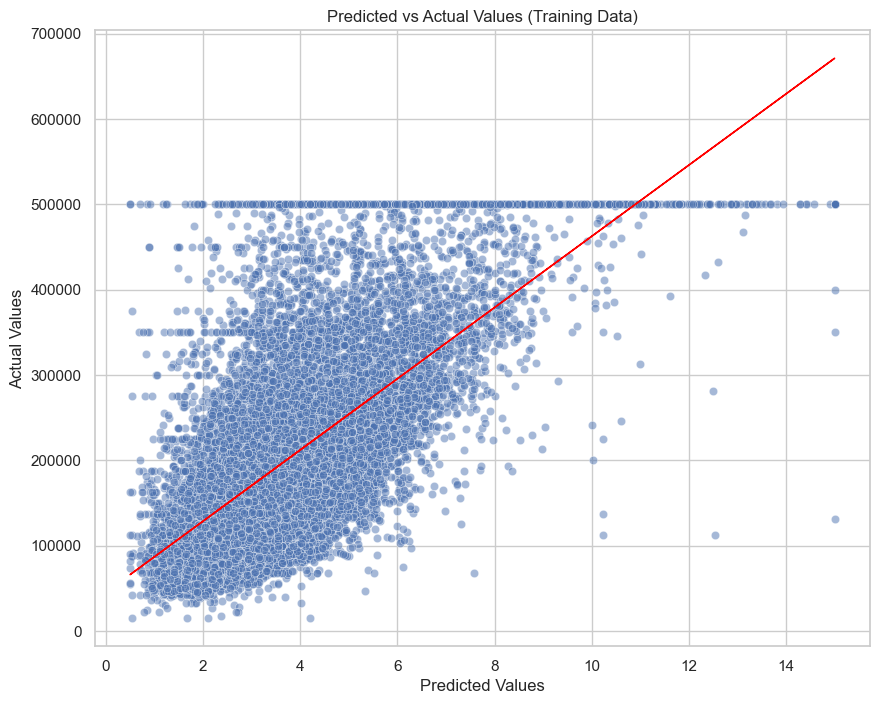

In [17]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='median_income', y='median_house_value', data=train_aug, alpha=0.5)
plt.plot(train_aug['median_income'], train_aug['fitted'], color='red', linewidth=1.09)
plt.title("Predicted vs Actual Values (Training Data)")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [18]:
# Predict on test data
test_predictions = slr_model.predict(test_data)
print(test_predictions.head(10))  # Equivalent to slice_head


4908     136138.821799
244      145027.500574
0        392683.618210
14685    296761.003038
8417     182401.682314
17127    253210.650130
282      340353.086832
13733    179589.020579
10034    148804.145781
10805    198029.899221
dtype: float64


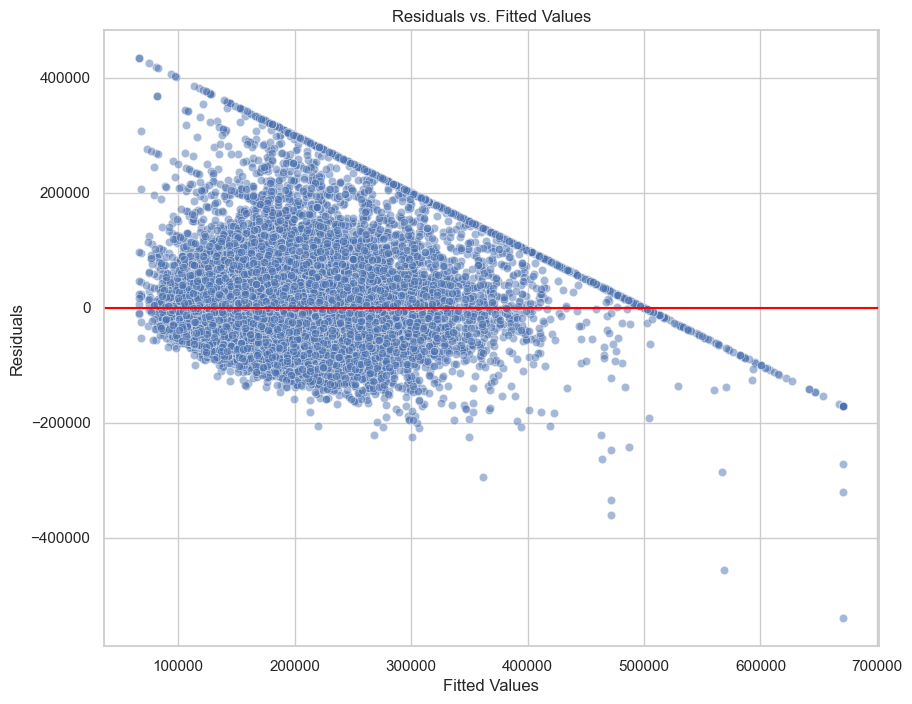

In [19]:
# Residuals vs Fitted Values
plt.figure(figsize=(10, 8))
sns.scatterplot(x=train_aug['fitted'], y=train_aug['residuals'], alpha=0.5)
plt.axhline(y=0, color='red')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


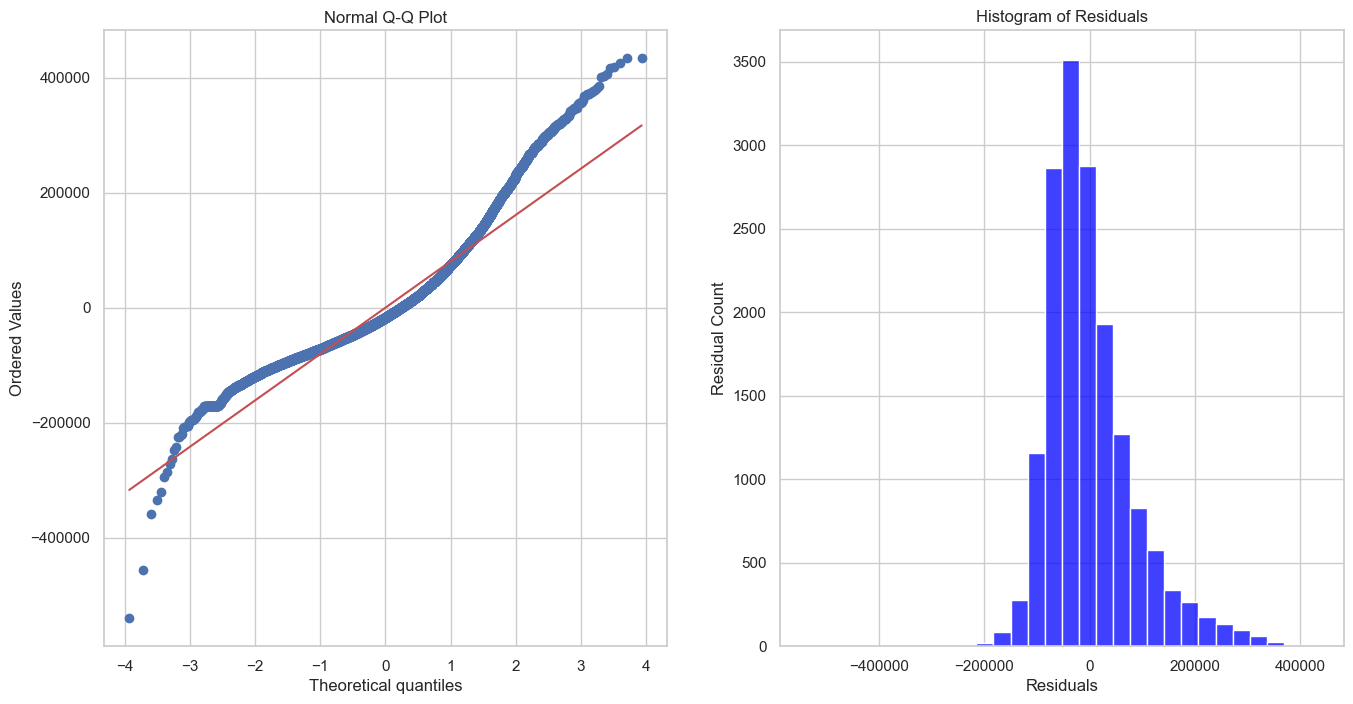

In [22]:
# Q-Q Plot and Histogram of Residuals
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Q-Q Plot
stats.probplot(train_aug['residuals'], dist="norm", plot=axs[0])
axs[0].set_title("Normal Q-Q Plot")

# Histogram of Residuals
sns.histplot(train_aug['residuals'], bins=30, kde=False, color='blue', ax=axs[1])
axs[1].set_title("Histogram of Residuals")
axs[1].set_xlabel("Residuals")
axs[1].set_ylabel("Residual Count")

plt.show()


## Compute R-squared and Mean Squared Error (MSE) on Training Data

In this step, we calculate two important metrics to evaluate the performance of our linear regression model on the training data:

1. **R-squared (R²):** This metric represents the proportion of the variance in the dependent variable (median house value) that is predictable from the independent variable(s). It gives an indication of how well our model fits the data, with a value closer to 1 indicating a better fit.

2. **Mean Squared Error (MSE):** MSE measures the average of the squares of the errors—that is, the average squared difference between the observed actual outcomes and the outcomes predicted by the model. A lower MSE indicates a better fit of the model to the data.



In [23]:
# Compute R-squared and MSE on training data
r_squared = r2_score(train_data['median_house_value'], train_aug['fitted'])
mse = mean_squared_error(train_data['median_house_value'], train_aug['fitted'])
print(f"R-squared: {r_squared:.3f}, MSE: {mse:.3f}")

R-squared: 0.473, MSE: 7051072420.084


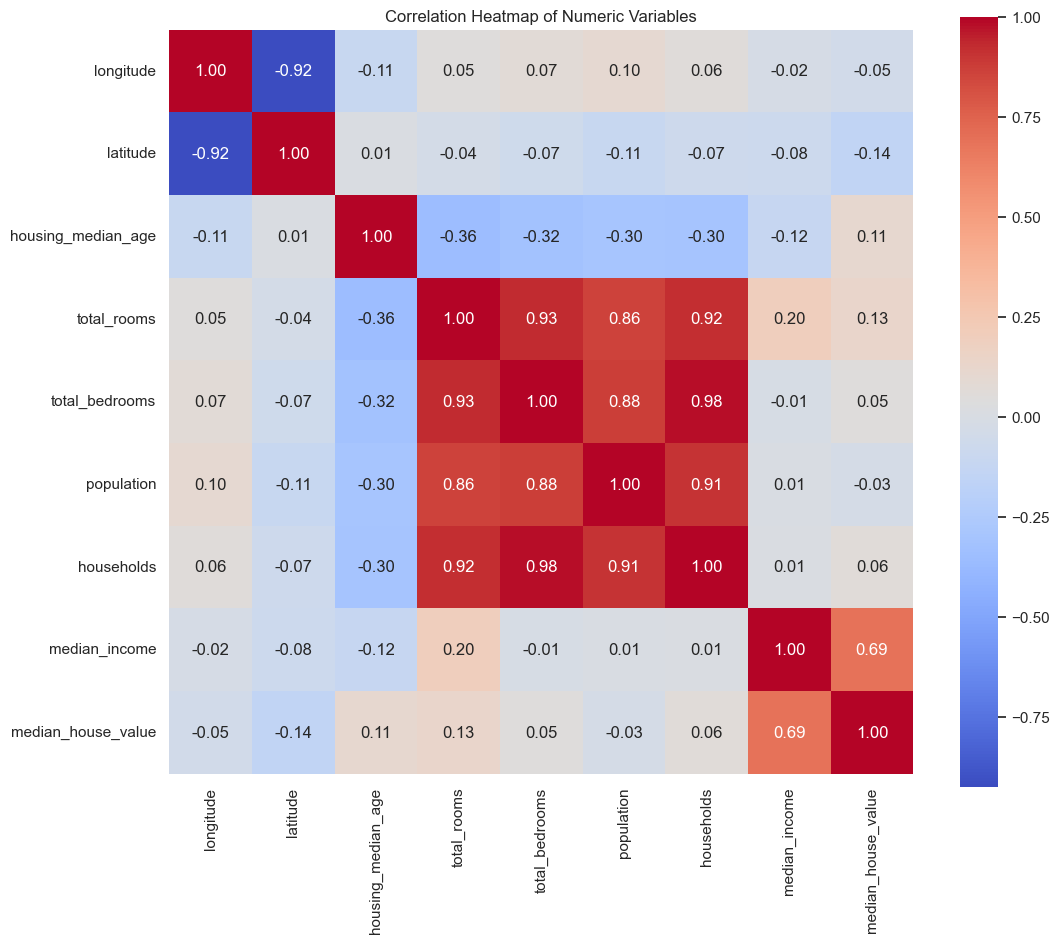

In [24]:
# Compute correlations and plot the heatmap
housing_numeric = housing.select_dtypes(include=[np.number]).dropna()
correlation_matrix = housing_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

In [25]:
# Developing the multiple linear regression model
mlr_model = smf.ols('median_house_value ~ median_income + population + total_bedrooms', data=train_data).fit()
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     5500.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:17:31   Log-Likelihood:            -2.0806e+05
No. Observations:               16345   AIC:                         4.161e+05
Df Residuals:                   16341   BIC:                         4.162e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.985e+04   1673.547     23.